# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"+ "units=Imperial&"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "&q=" + city.replace(" ","+")
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+") 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]   
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | isiro
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | ahipara
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | osmena
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | jutai
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | ganzhou
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 o

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count(0)

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.95,69,24,12.08,PF,1681314365
1,isiro,2.7739,27.6160,79.38,60,100,3.15,CD,1681314365
2,sitka,57.0531,-135.3300,39.09,65,100,8.05,US,1681314365
3,yellowknife,62.4560,-114.3525,16.32,73,75,11.50,CA,1681314366
4,ahipara,-35.1667,173.1667,64.40,87,25,12.97,NZ,1681314366


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,76.95,69,24,12.08,PF,1681314365
1,isiro,2.7739,27.6160,79.38,60,100,3.15,CD,1681314365
2,sitka,57.0531,-135.3300,39.09,65,100,8.05,US,1681314365
3,yellowknife,62.4560,-114.3525,16.32,73,75,11.50,CA,1681314366
4,ahipara,-35.1667,173.1667,64.40,87,25,12.97,NZ,1681314366


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

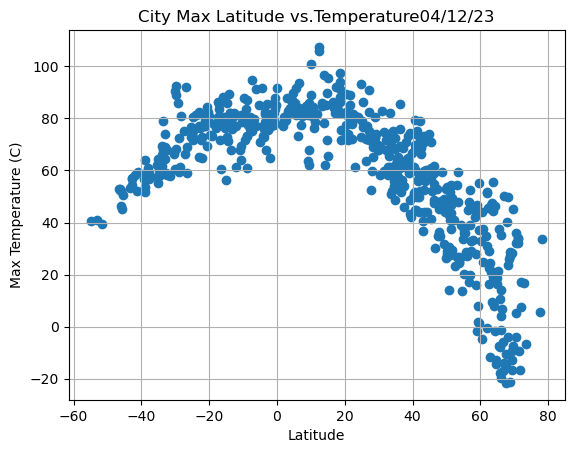

In [45]:
# Build scatter plot for latitude vs. temperature
l_values = city_data_df["Lat"]      
t_values = city_data_df["Max Temp"]     
plt.scatter(l_values,t_values)
plt.title("City Max Latitude vs.Temperature" + time.strftime("%x"))    
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
             

# Incorporate the other graph properties
  

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

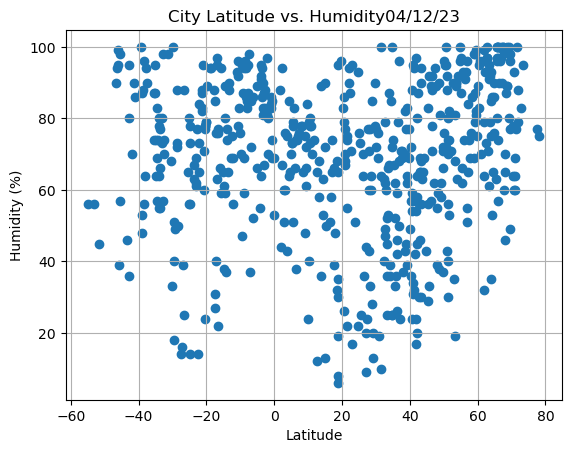

In [46]:
# Build the scatter plots for latitude vs. humidity
l_values = city_data_df["Lat"]
h_values = city_data_df["Humidity"]
plt.scatter(l_values,h_values)
plt.title("City Latitude vs. Humidity" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

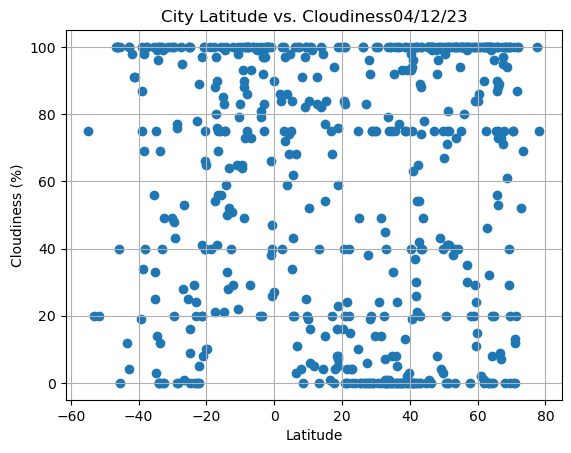

In [47]:
# Build the scatter plots for latitude vs. cloudiness
l= city_data_df["Lat"]
c= city_data_df["Cloudiness"]
plt.scatter(l,c)
plt.title("City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

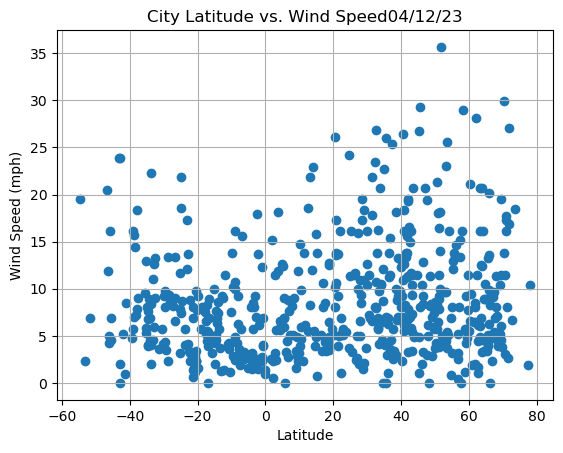

In [48]:
# Build the scatter plots for latitude vs. wind speed
l= city_data_df["Lat"]
w= city_data_df["Wind Speed"]
plt.scatter(l,w)
plt.title("City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        # Annotate the text for the line equation
        plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,isiro,2.7739,27.6160,79.38,60,100,3.15,CD,1681314365
2,sitka,57.0531,-135.3300,39.09,65,100,8.05,US,1681314365
3,yellowknife,62.4560,-114.3525,16.32,73,75,11.50,CA,1681314366
6,khatanga,71.9667,102.5000,17.06,79,100,27.04,RU,1681314366
7,nikolskoye,59.7035,30.7861,55.29,75,15,7.70,RU,1681314366


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,76.95,69,24,12.08,PF,1681314365
4,ahipara,-35.1667,173.1667,64.40,87,25,12.97,NZ,1681314366
5,lebu,-37.6167,-73.6500,56.89,90,100,9.06,CL,1681314366
8,hobart,-42.8794,147.3294,57.06,95,100,0.00,AU,1681314079
11,jutai,-5.1833,-68.9000,85.01,66,100,2.86,BR,1681314367


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7305096741274083


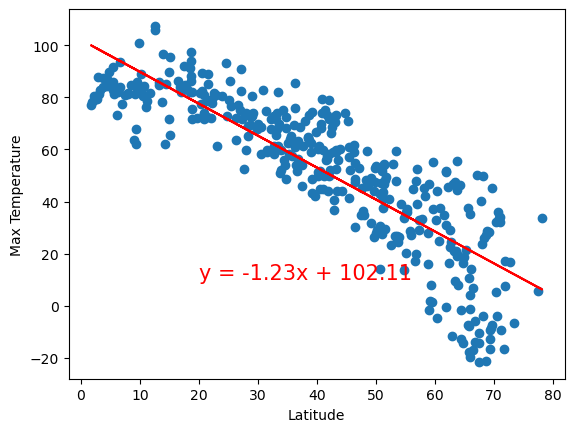

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype('float')
y_values = northern_hemi_df["Max Temp"].astype('float') 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print (f"The r-squared is: {rvalue**2}")
plt.show()  


The r-squared is: 0.5292050815546702


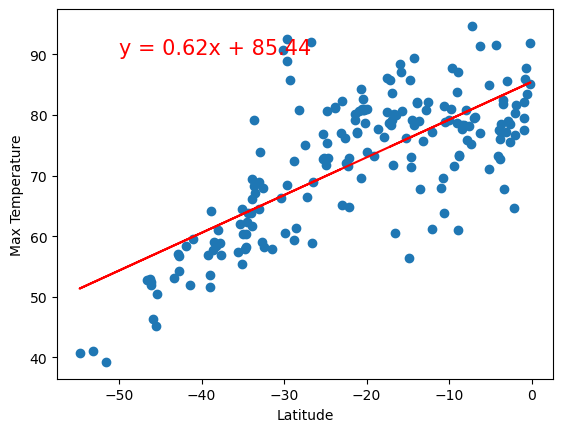

In [58]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype('float')
y_values = southern_hemi_df["Max Temp"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print (f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1071020555253316


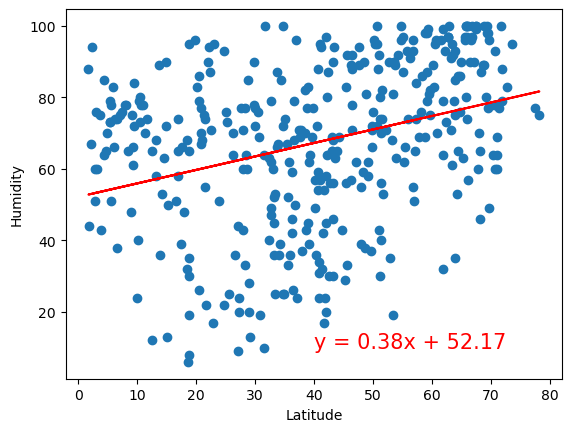

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype('float')
y_values = northern_hemi_df["Humidity"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print (f"The r-squared is: {rvalue**2}")
plt.show()


The r-value is: 0.0002808747046324607


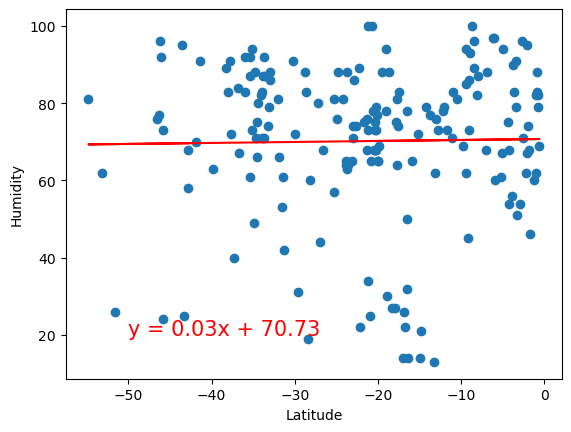

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype('float')

y_values = southern_hemi_df["Humidity"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print (f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02753965355174336


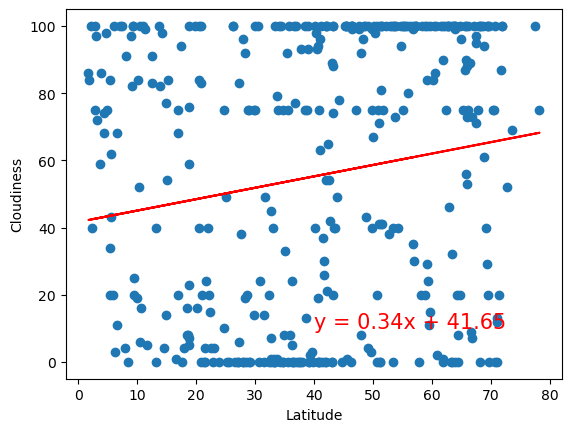

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype('float')
y_values = northern_hemi_df["Cloudiness"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print (f"The r-squared is: {rvalue**2}")
plt.show()




The r-squared is: 0.03476533989831334


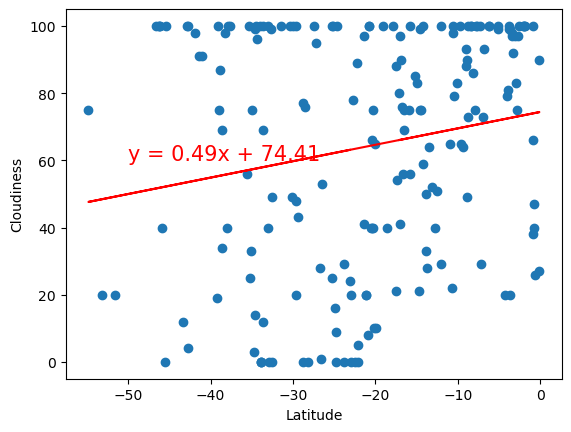

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype('float')
y_values = southern_hemi_df["Cloudiness"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print (f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00722234216762581


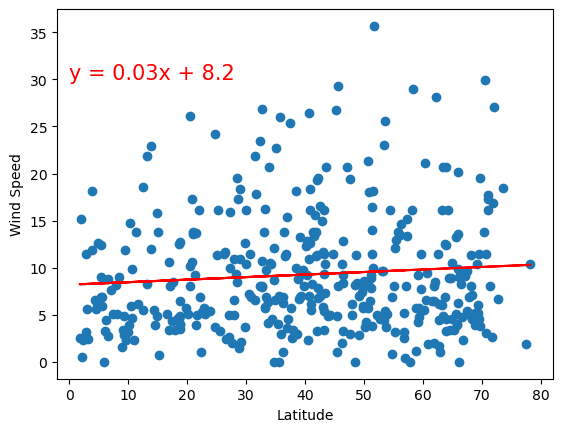

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype('float')
y_values = northern_hemi_df["Wind Speed"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print (f"The r-squared is: {rvalue**2}")
plt.show()




The r-value is: 0.062239040700515696


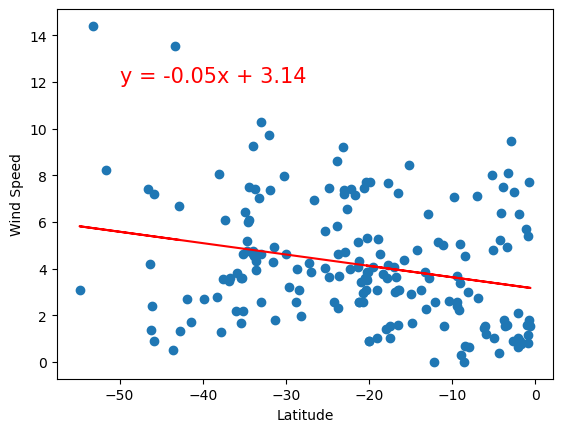

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype('float')
y_values = southern_hemi_df["Wind Speed"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print (f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#The measuments are not very strong, but there is a slight correlation between latitude and max temperature. 
#The closer to the equator, the higher the max temperature. The correlation between latitude and humidity is not very strong.